In [1]:
NEURON_LAYER = 256
EPOCH = 200

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.graphics.tsaplots as sgt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('../attributes_dataset/rainfall_clean.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)
df.columns = ['y']
df.head()

,y
date,
2020-01-01,0.2
2020-01-02,0.0
2020-01-03,0.5
2020-01-04,7.6
2020-01-05,4.3


# Convert Dataframe to Array

In [4]:
def df_to_array(df, window_size):
    df_y_np = df.y.to_numpy()
    df_index_np = df.index.to_numpy()
    
    x = []
    y = []
    date = []
    for i in range(len(df_index_np) - window_size):
        row = [[a] for a in df_y_np[i:i+window_size]]
        x.append(row)
        label = df_y_np[i+window_size]
        y.append(label)
        index = df_index_np[i+window_size]
        date.append(index)
        
    return np.array(x), np.array(y), np.array(date)

# Configure Batch Size

In [5]:
WINDOW_SIZE = 128

# Split the Data

In [6]:
train_ratio = int(len(df) * 0.8)
test_ratio = train_ratio + int(len(df) * 0.1)

dtrain, dval, dtest = df.iloc[:train_ratio], df.iloc[(train_ratio - WINDOW_SIZE):test_ratio], df.iloc[(test_ratio - WINDOW_SIZE):]

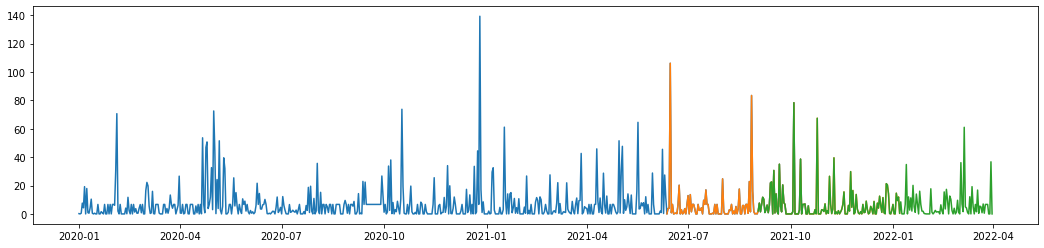

In [7]:
plt.figure(figsize=(18,4))
plt.plot(dtrain)
plt.plot(dval)
plt.plot(dtest)

# Standarization for data train

In [8]:
dev_val = dtrain.std()[0]
mean_val = dtrain.mean()[0]

def make_std(data):
    data_std = data    
    data_std = (data_std-mean_val)/dev_val
    
    return data_std

In [9]:
dtrain_std = make_std(dtrain)

In [10]:
dval_std = make_std(dval)

In [11]:
dtest_std = make_std(dtest)

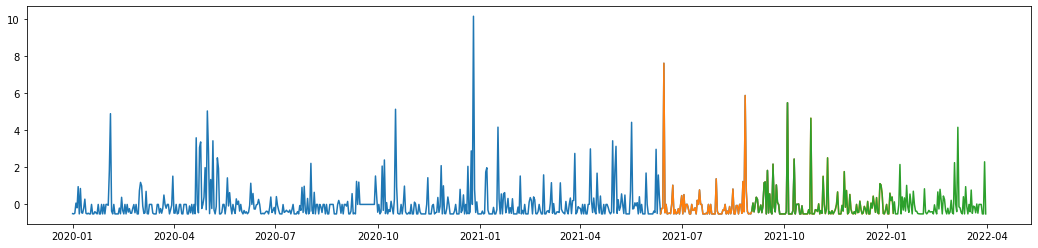

In [12]:
plt.figure(figsize=(18,4))
plt.plot(dtrain_std)
plt.plot(dval_std)
plt.plot(dtest_std)

# De-standarization Function

In [13]:
def de_std(df):
    column = ['Predictions', 'Actuals']
    for index, row in df.iterrows():
        for col in column:
            val = df.loc[index, col]
            df.loc[index, col] = (dev_val * val) + mean_val        

## Get x and y values

In [14]:
X_train, y_train, date_train = df_to_array(dtrain_std, WINDOW_SIZE)
X_val, y_val, date_val = df_to_array(dval_std, WINDOW_SIZE)
X_test, y_test, date_test = df_to_array(dtest_std, WINDOW_SIZE)

# Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE,1)))
model1.add(LSTM(NEURON_LAYER))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 266,257
Trainable params: 266,257
Non-trainable params: 0
_________________________________________________________________


### Saving the Model

In [17]:
cp = ModelCheckpoint('LSTM_models/model_cp/', save_best_only=True)

In [18]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
%%time
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp])

Epoch 1/200
17/17 [==============================] - ETA: 0s - loss: 0.9868 - root_mean_squared_error: 0.9934

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


17/17 [==============================] - 15s 713ms/step - loss: 0.9868 - root_mean_squared_error: 0.9934 - val_loss: 0.6099 - val_root_mean_squared_error: 0.7810
Epoch 2/200
17/17 [==============================] - 6s 329ms/step - loss: 0.9833 - root_mean_squared_error: 0.9916 - val_loss: 0.6104 - val_root_mean_squared_error: 0.7813
Epoch 3/200
17/17 [==============================] - 6s 360ms/step - loss: 0.9817 - root_mean_squared_error: 0.9908 - val_loss: 0.6103 - val_root_mean_squared_error: 0.7812
Epoch 4/200
17/17 [==============================] - ETA: 0s - loss: 0.9810 - root_mean_squared_error: 0.9905

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


17/17 [==============================] - 10s 594ms/step - loss: 0.9810 - root_mean_squared_error: 0.9905 - val_loss: 0.6096 - val_root_mean_squared_error: 0.7808
Epoch 5/200
17/17 [==============================] - ETA: 0s - loss: 0.9796 - root_mean_squared_error: 0.9897

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


17/17 [==============================] - 11s 682ms/step - loss: 0.9796 - root_mean_squared_error: 0.9897 - val_loss: 0.6091 - val_root_mean_squared_error: 0.7805
Epoch 6/200
17/17 [==============================] - 7s 406ms/step - loss: 0.9785 - root_mean_squared_error: 0.9892 - val_loss: 0.6098 - val_root_mean_squared_error: 0.7809
Epoch 7/200
17/17 [==============================] - 7s 414ms/step - loss: 0.9776 - root_mean_squared_error: 0.9887 - val_loss: 0.6098 - val_root_mean_squared_error: 0.7809
Epoch 8/200
17/17 [==============================] - 8s 481ms/step - loss: 0.9758 - root_mean_squared_error: 0.9878 - val_loss: 0.6102 - val_root_mean_squared_error: 0.7812
Epoch 9/200
17/17 [==============================] - 8s 437ms/step - loss: 0.9748 - root_mean_squared_error: 0.9873 - val_loss: 0.6112 - val_root_mean_squared_error: 0.7818
Epoch 10/200
17/17 [==============================] - 8s 465ms/step - loss: 0.9738 - root_mean_squared_error: 0.9868 - val_loss: 0.6103 - val_root

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


17/17 [==============================] - 10s 624ms/step - loss: 0.9182 - root_mean_squared_error: 0.9582 - val_loss: 0.5948 - val_root_mean_squared_error: 0.7712
Epoch 61/200
17/17 [==============================] - 6s 338ms/step - loss: 0.9692 - root_mean_squared_error: 0.9845 - val_loss: 0.6051 - val_root_mean_squared_error: 0.7779
Epoch 62/200
17/17 [==============================] - 6s 361ms/step - loss: 0.9721 - root_mean_squared_error: 0.9860 - val_loss: 0.6051 - val_root_mean_squared_error: 0.7779
Epoch 63/200
17/17 [==============================] - 6s 369ms/step - loss: 0.9650 - root_mean_squared_error: 0.9823 - val_loss: 0.6050 - val_root_mean_squared_error: 0.7778
Epoch 64/200
17/17 [==============================] - 6s 360ms/step - loss: 0.9648 - root_mean_squared_error: 0.9822 - val_loss: 0.6050 - val_root_mean_squared_error: 0.7778
Epoch 65/200
17/17 [==============================] - 6s 358ms/step - loss: 0.9649 - root_mean_squared_error: 0.9823 - val_loss: 0.6049 - val_

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


17/17 [==============================] - 11s 649ms/step - loss: 1.0018 - root_mean_squared_error: 1.0009 - val_loss: 0.5867 - val_root_mean_squared_error: 0.7660
Epoch 125/200
17/17 [==============================] - 6s 341ms/step - loss: 0.9870 - root_mean_squared_error: 0.9935 - val_loss: 0.6176 - val_root_mean_squared_error: 0.7858
Epoch 126/200
17/17 [==============================] - 6s 367ms/step - loss: 0.9818 - root_mean_squared_error: 0.9909 - val_loss: 0.6077 - val_root_mean_squared_error: 0.7796
Epoch 127/200
17/17 [==============================] - 6s 367ms/step - loss: 0.9815 - root_mean_squared_error: 0.9907 - val_loss: 0.6052 - val_root_mean_squared_error: 0.7779
Epoch 128/200
17/17 [==============================] - 6s 358ms/step - loss: 0.9841 - root_mean_squared_error: 0.9920 - val_loss: 0.6037 - val_root_mean_squared_error: 0.7770
Epoch 129/200
17/17 [==============================] - 6s 361ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6038 -

Epoch 171/200
17/17 [==============================] - 7s 390ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6042 - val_root_mean_squared_error: 0.7773
Epoch 172/200
17/17 [==============================] - 6s 357ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6042 - val_root_mean_squared_error: 0.7773
Epoch 173/200
17/17 [==============================] - 7s 394ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6042 - val_root_mean_squared_error: 0.7773
Epoch 174/200
17/17 [==============================] - 6s 346ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6042 - val_root_mean_squared_error: 0.7773
Epoch 175/200
17/17 [==============================] - 6s 342ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_loss: 0.6043 - val_root_mean_squared_error: 0.7773
Epoch 176/200
17/17 [==============================] - 6s 345ms/step - loss: 0.9837 - root_mean_squared_error: 0.9918 - val_l

# Load the Model

## Train Results

In [20]:
train_prediction = model1.predict(X_train).flatten()
train_result = pd.DataFrame(data={'date': date_train,'Predictions': train_prediction, 'Actuals': y_train})
train_result.Predictions = round(train_result.Predictions, 2)
train_result.set_index('date', inplace=True)

In [21]:
de_std(train_result)

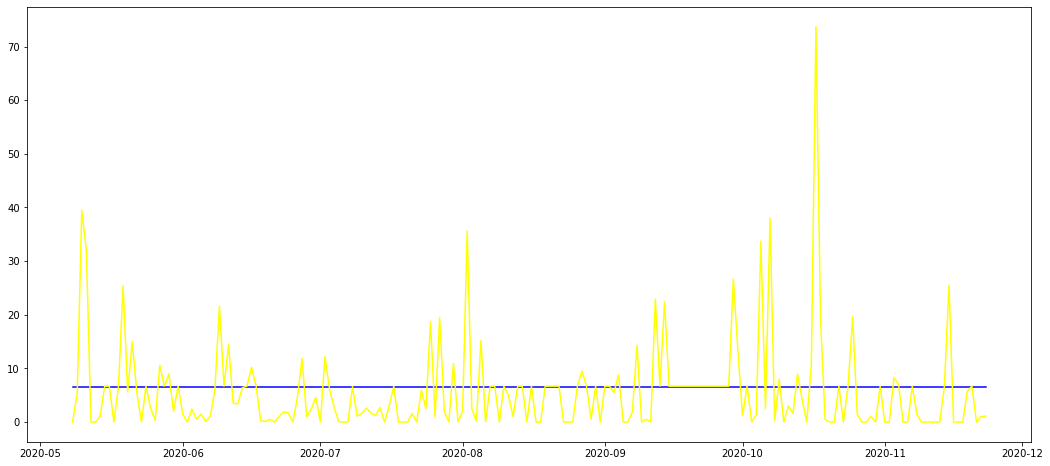

In [22]:
plt.figure(figsize=(18,8))
plt.plot(train_result['Predictions'][:200], color='blue')
plt.plot(train_result['Actuals'][:200], color='yellow')
plt.show()

In [23]:
train_MAE = mean_absolute_error(train_result['Actuals'], train_result['Predictions'])
train_RMSE = sqrt(mean_squared_error(train_result['Actuals'], train_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {train_MAE}')
print(f'Root Mean Squared Error is\t: {train_RMSE}')

Mean Absolute Error is		: 6.95146308948116
Root Mean Squared Error is	: 12.934435426857549


## Validation Results

In [24]:
val_prediction = model1.predict(X_val).flatten()
val_result = pd.DataFrame(data={'date': date_val, 'Predictions': val_prediction, 'Actuals': y_val})
val_result.set_index('date', inplace=True)
# val_result.Predictions = round(train_result.Predictions, 2)

In [25]:
de_std(val_result)

In [26]:
val_result

,Predictions,Actuals
date,,
2021-10-18,6.658171,8.881784e-16
2021-10-19,6.658171,8.881784e-16
2021-10-20,6.658171,8.881784e-16
2021-10-21,6.658171,8.881784e-16
2021-10-22,6.658171,8.881784e-16
...,...,...
2022-01-03,6.658171,8.881784e-16
2022-01-04,6.658171,1.460000e+01
2022-01-05,6.658171,9.400000e+00


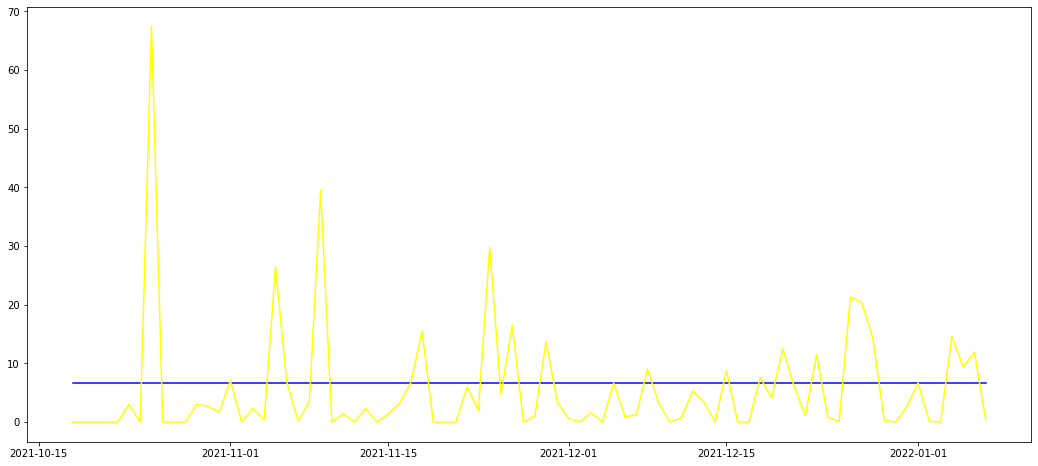

In [27]:
plt.figure(figsize=(18,8))
plt.plot(val_result['Predictions'], color='blue')
plt.plot(val_result['Actuals'], color='yellow')
plt.show()

In [28]:
val_MAE = mean_absolute_error(val_result['Actuals'], val_result['Predictions'])
val_RMSE = sqrt(mean_squared_error(val_result['Actuals'], val_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {val_MAE}')
print(f'Root Mean Squared Error is\t: {val_RMSE}')

Mean Absolute Error is		: 6.697053874242968
Root Mean Squared Error is	: 10.138590342197551


## Test Results

In [29]:
test_prediction = model1.predict(X_test).flatten()
test_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_prediction, 'Actuals': y_test})
test_result.set_index('date', inplace=True)
# test_result.Predictions = round(train_result.Predictions, 2)

In [30]:
de_std(test_result)

In [31]:
test_result

,Predictions,Actuals
date,,
2022-01-08,6.658171,8.500000e+00
2022-01-09,6.658171,8.881784e-16
2022-01-10,6.658171,8.881784e-16
2022-01-11,6.658171,8.881784e-16
2022-01-12,6.658171,6.700000e+00
...,...,...
2022-03-27,6.658171,6.688085e+00
2022-03-28,6.658171,8.881784e-16
2022-03-29,6.658171,8.881784e-16


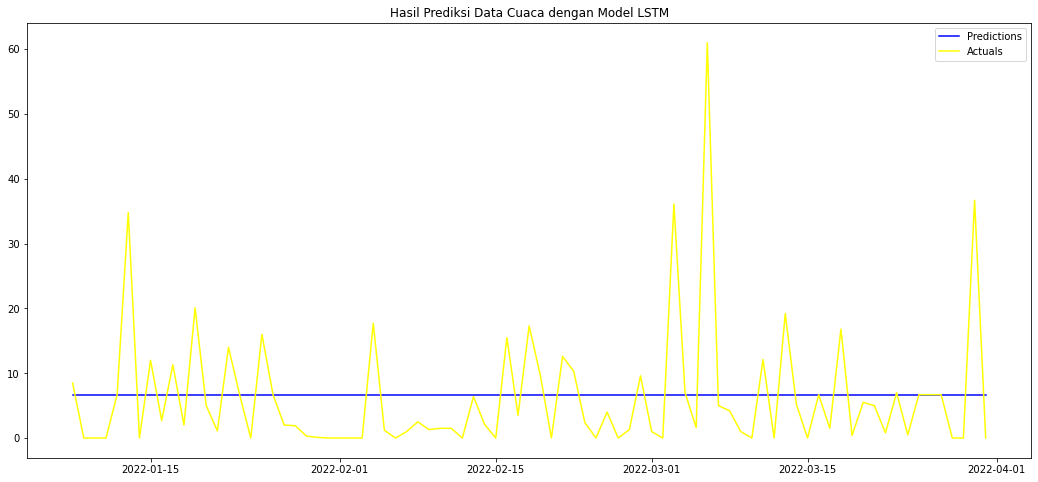

In [32]:
plt.figure(figsize=(18,8))
plt.title("Hasil Prediksi Data Cuaca dengan Model LSTM")
plt.plot(test_result['Predictions'], color='blue')
plt.plot(test_result['Actuals'], color='yellow')
plt.legend(['Predictions', 'Actuals'])
plt.show()
# plt.savefig('max_temp_LSTM.png')

In [33]:
test_MAE = mean_absolute_error(test_result['Actuals'], test_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_result['Actuals'], test_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 6.543166145313951
Root Mean Squared Error is	: 9.952867368518465


# LSTM forecast

In [34]:
def one_step_forecast(model, X):
    X_val = np.array(X)
    result = model.predict(X_val).flatten()
    X_val_update = []
    
    for lags in X_val:
        lags_update = []
        
        for value in lags:
            lags_update.append(value)
        
        lags_update.append(result)
        lags_update = lags_update[1:]
        
        X_val_update.append(lags_update)
    
    
    return result, np.array(X_val_update)

In [35]:
def LSTM_forecast(model, period, lags):
    lags = [lags]
    final_result = []
    iteration = 0
    while iteration < period:
        result, lags = one_step_forecast(model, lags)
        final_result.append(result[0])
        iteration += 1
    return np.array(final_result), lags

In [36]:
X_start_test = X_test[0]

In [37]:
result, X_next = LSTM_forecast(model1, period=len(X_test), lags=X_start_test)

In [38]:
test_forecast_prediction = result
test_forecast_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_forecast_prediction, 'Actuals': y_test})
test_forecast_result.set_index('date', inplace=True)

In [39]:
de_std(test_forecast_result)

In [40]:
test_forecast_result

,Predictions,Actuals
date,,
2022-01-08,6.658171,8.500000e+00
2022-01-09,6.658171,8.881784e-16
2022-01-10,6.658171,8.881784e-16
2022-01-11,6.658171,8.881784e-16
2022-01-12,6.658171,6.700000e+00
...,...,...
2022-03-27,6.658171,6.688085e+00
2022-03-28,6.658171,8.881784e-16
2022-03-29,6.658171,8.881784e-16


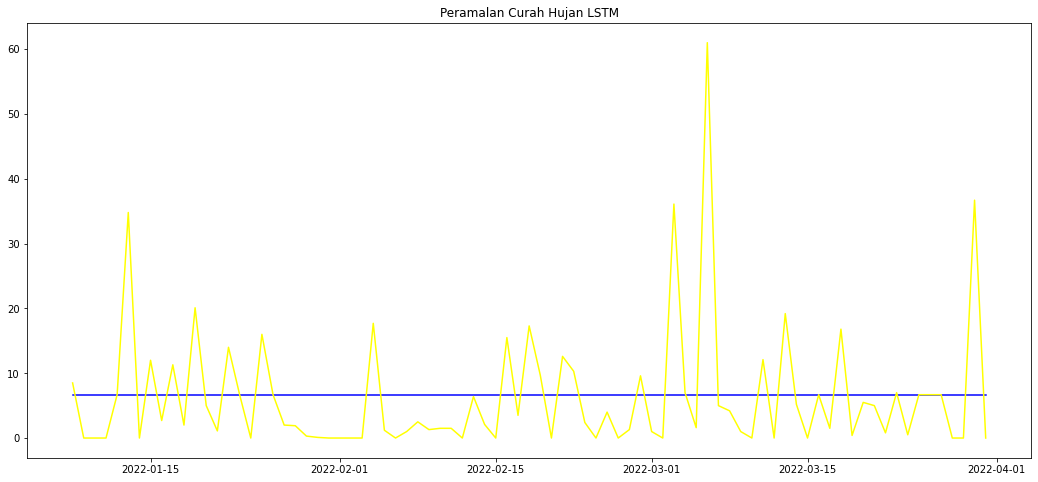

In [41]:
plt.figure(figsize=(18,8))
plt.title('Peramalan Curah Hujan LSTM')
plt.plot(test_forecast_result['Predictions'], color='blue')
plt.plot(test_forecast_result['Actuals'], color='yellow')
plt.show()

In [42]:
test_MAE = mean_absolute_error(test_forecast_result['Actuals'], test_forecast_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_forecast_result['Actuals'], test_forecast_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 6.543166145313951
Root Mean Squared Error is	: 9.952867368518465


# Plot Final Result

In [43]:
get_update_res = test_result.copy()
get_update_res.columns = ['Predictions_update', 'Actuals']
final_result = pd.concat([get_update_res, test_forecast_result[['Predictions']]], axis='columns')

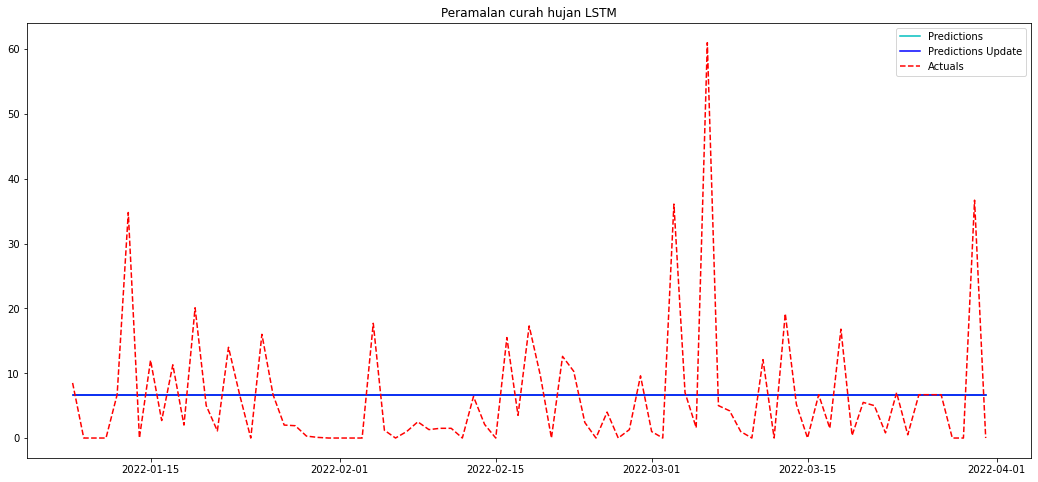

In [44]:
plt.figure(figsize=(18,8))
plt.title('Peramalan curah hujan LSTM')
plt.plot(final_result['Predictions'], 'c-',  label='Predictions')
plt.plot(final_result['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(final_result['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [45]:
print("Predictions Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 6.543166145313951
Root Mean Squared Error is	: 9.952867368518465


In [46]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 6.543166145313951
Root Mean Squared Error is	: 9.952867368518465


In [47]:
final_result.to_csv('LSTM_results_temp/rain_n'+str(NEURON_LAYER)+'_e'+str(EPOCH)+'.csv')

# Best Result

In [2]:
df_best = pd.read_csv('LSTM_results_temp/rain_n256_e200.csv')
df_best.date = pd.to_datetime(df_best.date, format='%Y-%m-%d')
df_best.set_index('date', inplace=True)
df_best.head()

,Predictions_update,Actuals,Predictions
date,,,
2022-01-08,6.658171,8.500000e+00,6.658171
2022-01-09,6.658171,8.881784e-16,6.658171
2022-01-10,6.658171,8.881784e-16,6.658171
2022-01-11,6.658171,8.881784e-16,6.658171
2022-01-12,6.658171,6.700000e+00,6.658171


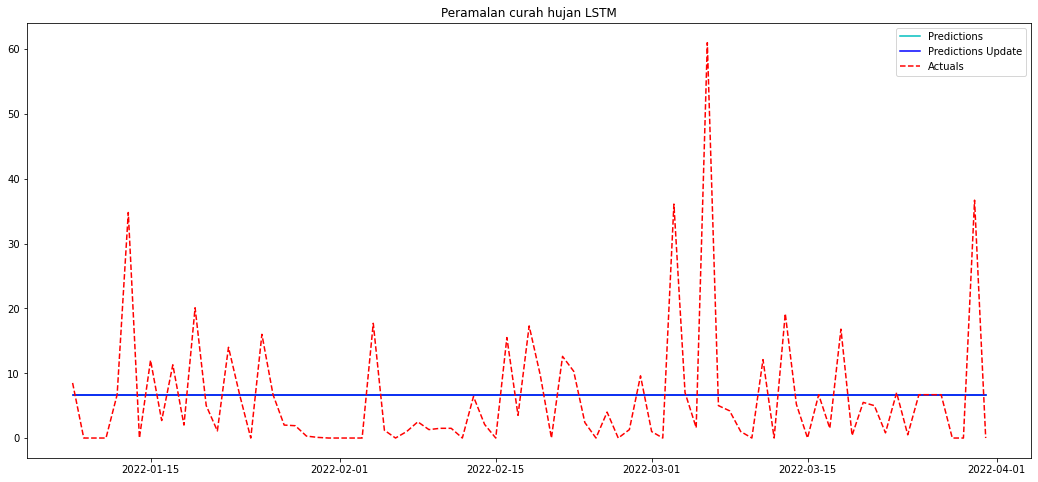

In [3]:
plt.figure(figsize=(18,8))
plt.title('Peramalan curah hujan LSTM')
plt.plot(df_best['Predictions'], 'c-',  label='Predictions')
plt.plot(df_best['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(df_best['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [4]:
print("Predictions Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 6.543166092027685
Root Mean Squared Error is	: 9.95286736316467


In [5]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 6.543166092027685
Root Mean Squared Error is	: 9.95286736316467
